# Increasing Employee Retention

![](https://i.pinimg.com/originals/58/ff/ce/58ffce692cc74a0581d2e8ff6890f19a.gif)

In this project we will be looking at exit surverys from employees of the Department of Education, Training and Employment (DETE) & the Technical and Further Education (TAFE) institue in Queensland, Australia. The DETE data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 
    The goal of this project is:
 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Data Dictionary:

`dete_survery.csv`: <br>
<br>
    - `ID` - An id used to identify the participant of the survery <br>
    - `SeperationType` - The reason why the person's employment ended <br>
    - `Cease Date` - The year or month the person's employment ended <br>
    - `DETE Start Date` - The year the person began employment with the DETE <br>
    
`tafe_survery.csv`: <br>
<br>
    - `Record ID` - An id used to identify the participant of the survery <br>
    - `Reeason for ceasing employment` - The reason why the person's employment ended <br>
    - `LengthofServiceOverall. Overall Length of Service at Institute (in years)` - The length of the person's employment (in years) <br>

### Summary 

write

## Initial Exploration

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in datasets

dete_survey = pd.read_csv(r'C:\Users\david\Downloads\exit_surverys\dete_survey.csv', encoding='utf8')
tafe_survey = pd.read_csv(r'C:\Users\david\Downloads\exit_surverys\tafe_survey.csv', encoding='utf8')

### Exploring dete_survey

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.isna().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Let's take a look at `tafe_survey` now.

### Exploring tafe_survey

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.isna().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [7]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


---

## Initial Observations

We can see that `dete_survey` has 822 rows and 56 columns. `tafe_survey` has 702 rows and 72 columns. Aditionally, it seems like `dete_survey` has entries labelled as "Not Stated" which is read in by Pandas as strings instead of NaN. So we'll be reading in the csv file again with every "Not Stated" string being converted to Nan. 

Lastly, we'll be removing a good chunk of columns as they do not pretain to answering our two questions as well as altering the column names so that we'll eventually be able to merge the columns easier.

---

## Transforming Data

In [8]:
dete_survey = pd.read_csv(r'C:\Users\david\Downloads\exit_surverys\dete_survey.csv', encoding='utf8', na_values='Not Stated')


# Drop columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Clean column names
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Now that our columns have been renamed let's look at all the possible reasons for employee seperation for both dataframes.

In [10]:
# Print unique values

dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# Print unique values

tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

The `seperationtype` column of the `tafe_survey_updated` dataframe has all of the employees who resigned under the string 'Resignation'. While the `seperationtype` column of the `dete_survey_updated` dataframe has employees who have resigned under 3 different subcategories (`Resignation-Other reasons`, `Resignation-Other employer`, `Resignation-Move overseas/interstate`). 

Let's clean and merge all of those resignation types into one to help our analysis.

In [12]:
# Filter out all subcategories of resignation types in dete dataframe

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
# Select only the resignation seperation types from both dataframes

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In the code blocks above we've:

- Standardized the columns names
- Grouped together all the resignation subcategories into `Resignation` for `dete_survey_update` 

This will help when we merge the two dataframes.

---

## Verifying the Data

Before we merge the dataframes we're going to do some quick checks on the data to make sure that the values are within reasonable ranges. Specifically, we will be looking for data inconsistencies in both dataframes.

In [15]:
# Print unique values

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [16]:
# Filters out the months and leaves us with only the years as floats

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

print('Cease dates column of DETE dataset: \n', dete_resignations['cease_date'].value_counts(), '\n')
print('Start dates column of DETE dataset: \n', dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

Cease dates column of DETE dataset: 
 2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64 

Start dates column of DETE dataset: 
 2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [17]:
# Print unique values sorted by index

tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

<AxesSubplot:>

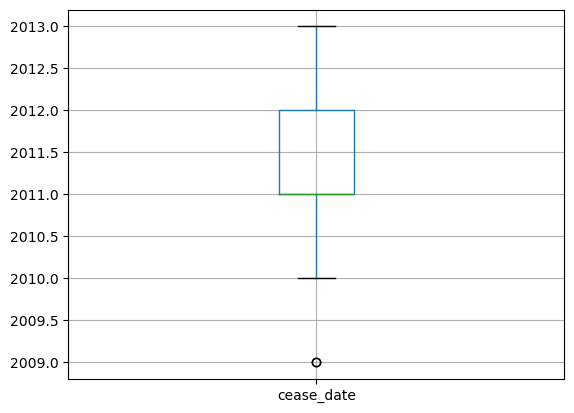

In [18]:
# Make a box plot

tafe_resignations.boxplot(column=['cease_date'])

As shown above, we've verified that there are no illogical date ranges for both dataframes.

---

## Creating a new column

Since we want to merge both dataframes into one it's important that each columns that store the same type of information in each dataframe. For instance, the TAFE dataframe has a column named `service` (which we renamed to `institute_service`), which is the total length of time an employee has been employed. 

The DETE dataframe does not contain this column or a similar column, but it does contain columns that we can use to calculate an employees total time spent employed. Let's create a new column and fill it with the total length of employement for each employee.

In [19]:
# Create a column that has the total length of employment 

dete_resignations['institute_service'] = dete_resignations['cease_date']- dete_resignations['dete_start_date'] 

# Check our work

dete_resignations['institute_service'].sort_index()

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

---

## Identifiying Dissatisfied Employees

Below are the columns from each dataframe that we'll use to determine if employees are dissatisfied:

1. tafe_survey_updated:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

2. dafe_survey_updated:

- `job_dissatisfaction`
- `issatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [20]:
# Print unique values

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [21]:
# Print unique values

tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [22]:
# Update values to be either True, False or NaN

def update_values(element):
    if element == '-':
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True

# Pass dataframe through above function
    
cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_values).any(1, skipna=False)
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: bool

We now have a column titled `dissatisfied` for the TAFE dataframe. Let's create the same column and fill it with similar data for the DETE dataframe.

In [23]:
# Create a list of column names to select
dete_cols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
]

dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [24]:
# Create a copy of both dataframes

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Above we've created a boolean index for our dissatisfied columns, where `True` indicates an employee is dissatisfied and `False` indicates an employee is not dissatisfied.

---

## Combine The Data

To recap, we've accomplished the following:

 - Renamed our columns
 - Dropped any data not needed for our analysis
 - Verified the quality of our data
 - Created a new institute_service column
 - Cleaned the Contributing Factors columns
 - Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now that we've cleaned our data we can combined both our datasets. The goal is to specifically aggregate the data according to the `institute_service` column.

In [25]:
dete_resignations_up['institute'] = 'DETE' # Add columns to each dataframe to identifiy which rows belong to which dataframe
tafe_resignations_up['institute'] = 'TAFE' # after the merge

combined = pd.concat([dete_resignations_up, tafe_resignations_up]) # Merge together the dataframes
combined_updated = combined.dropna(thresh=500, axis=1) # Drop columns with excessive NaN values

In [26]:
# Check to see if our code worked

combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
5,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
8,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
9,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
11,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


In [27]:
# Print unique values

combined_updated['institute_service'].value_counts

<bound method IndexOpsMixin.value_counts of 3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5-6
697     1-2
698     NaN
699     5-6
701     3-4
Name: institute_service, Length: 651, dtype: object>

In [37]:
# Extract numeric values with regrex expression

combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

C:\Users\david\AppData\Local\Temp\ipykernel_23040\2807324285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
C:\Users\david\AppData\Local\Temp\ipykernel_23040\2807324285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)


In [31]:
combined_updated['institute_service_up']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5.0
697     1.0
698     NaN
699     5.0
701     3.0
Name: institute_service_up, Length: 651, dtype: float64

In [30]:
combined_updated['service_cat']

KeyError: 'service_cat'

In [ ]:
# Transform year ranges (5-7) to a single digit (5)

def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

# Apply the above function and assign the result to a new column
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)


# Check to see if the function worked properly

combined_updated['service_cat'].value_counts()

In [ ]:
# Check for NaN values

combined_updated['dissatisfied'].value_counts(dropna=False)

In [ ]:
pv_combined = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [ ]:
pv_combined.plot(kind='bar', rot=30)
plt.title("Dissatisfaction by Career Bracket")
plt.ylabel('Dissatisfaction')
plt.xlabel('Career Bracket')
plt.show()